In [2]:
import numpy as np
import pandas as pd

In [4]:
breast = pd.read_csv('breast cancer.csv')

In [5]:
breast.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# M -> Malignant 
# B -> Benign

In [7]:
breast.shape

(569, 33)

In [8]:
breast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Data Preprocessing

In [10]:
breast.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [16]:
breast.shape

(569, 32)

## Encoding the Target Variable

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
breast['diagnosis'] = le.fit_transform(breast['diagnosis'])

In [18]:
breast['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## Splitting the Data into Training & Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

In [21]:
X = breast.drop('diagnosis', axis=1)
y = breast['diagnosis']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(455, 31)

In [24]:
X_test.shape

(114, 31)

In [25]:
y_train.shape

(455,)

In [26]:
y_test.shape

(114,)

## Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [31]:
X_test

array([[-0.25693197, -0.4877952 , -0.25088379, ..., -0.21989091,
         0.23083947,  0.17173277],
       [-0.24823384,  1.37325734,  0.36318719, ...,  0.93019499,
        -0.58958803, -0.972629  ],
       [-0.2578254 ,  0.37225845, -0.05148067, ...,  0.52157274,
        -0.08280128, -0.21536971],
       ...,
       [-0.24795075, -0.76105639, -1.08248546, ..., -0.30042664,
        -0.3893541 , -0.32657562],
       [-0.24796675,  0.01558068,  1.84511495, ..., -0.50681802,
        -1.76086788, -0.33345979],
       [ 0.74524498,  1.88813896,  2.58607883, ...,  0.73702811,
        -0.02786985, -0.10998887]])

## Exploratory Data Analysis(EDA)

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

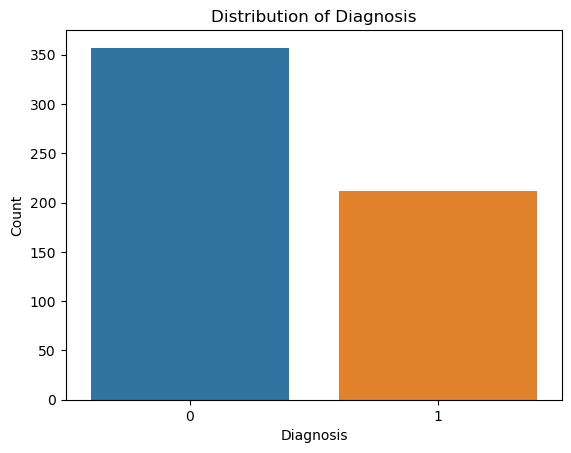

In [33]:
sns.countplot(x=breast['diagnosis'])
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel('Count')
plt.show()

In [34]:
breast.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


## Training Model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = lr.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)

In [40]:
accuracy

0.9824561403508771

## Prediction

In [44]:
input_text = (-0.23711093, -0.4976419 ,  0.61365274, -0.49813131, -0.53102815,
       -0.57694824, -0.17494424, -0.36215622, -0.284859  ,  0.43345165,
        0.17818232, -0.36844966,  0.55310406, -0.31671104, -0.40524636,
        0.04025752, -0.03795529, -0.18043065,  0.16478901, -0.12170969,
        0.23079329, -0.50044002,  0.81940367, -0.46922838, -0.53308833,
       -0.04910117, -0.04160193, -0.14913653,  0.09681787,  0.10617647,
        0.49035329)
np_df = np.asarray(input_text)
pred = lr.predict(np_df.reshape(1, -1))

In [45]:
if pred[0] == 1:
    print("Cancerous")
else:
    print("Not Cancerous")

Not Cancerous


In [46]:
import pickle
pickle.dump(lr, open('breast_cancer_detection_model.pkl','wb'))